<a href="https://colab.research.google.com/github/AlvaroGarcia-Cid/practica-4/blob/main/LAB04_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 4 - Pregunta 3
### Hecho por: Daniel Alonso, Álvaro García Cid, Enrique Ramos e Ignacio Regidor

#Introducción al problema y pasos previos
A continuación se muestrán las librerías de Python utilizadas en esta práctica.
- Numpy: utilizada por el resto de liberías, permite la creación y el manejo de datos de forma rápida y eficiente, conteniendo estructuras de datos propias.
- Pandas: permite la creación y manejo de dataframes a partir de la base de datos empleada.
- Matplotlib.pyplot: se utilizará para graficar los distintos diagramas que permitan el estudio de los datos de forma visual.

In [1]:
import numpy as np 
import pandas as pd 
import sklearn as sk 
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder 
import scipy.cluster.hierarchy as sch 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster,cut_tree
from sklearn.metrics import silhouette_score

#Importamos la base de datos
datos = pd.read_csv('enfermeria.csv', encoding = 'latin_1')
datos.info()
datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   parents_occupation  12960 non-null  object
 1   childs_nursery      12960 non-null  object
 2   family_form         12960 non-null  object
 3   number_children     12960 non-null  object
 4   housing_conditions  12960 non-null  object
 5   financial_standing  12960 non-null  object
 6   social_conditions   12960 non-null  object
 7   health_conditions   12960 non-null  object
 8   recommendation      12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions,recommendation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [2]:
print(datos['parents_occupation'].value_counts())
print(datos['childs_nursery'].value_counts())
print(datos['family_form'].value_counts())
print(datos['number_children'].value_counts())
print(datos['housing_conditions'].value_counts())
print(datos['financial_standing'].value_counts())
print(datos['social_conditions'].value_counts())
print(datos['health_conditions'].value_counts())
print(datos['recommendation'].value_counts())

usual          4320
pretentious    4320
great_pret     4320
Name: parents_occupation, dtype: int64
proper         2592
less_proper    2592
improper       2592
critical       2592
very_crit      2592
Name: childs_nursery, dtype: int64
complete      3240
completed     3240
incomplete    3240
foster        3240
Name: family_form, dtype: int64
1       3240
2       3240
3       3240
more    3240
Name: number_children, dtype: int64
convenient    4320
less_conv     4320
critical      4320
Name: housing_conditions, dtype: int64
convenient    6480
inconv        6480
Name: financial_standing, dtype: int64
nonprob          4320
slightly_prob    4320
problematic      4320
Name: social_conditions, dtype: int64
recommended    4320
priority       4320
not_recom      4320
Name: health_conditions, dtype: int64
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: recommendation, dtype: int64


# Preprocesamiento de los datos

Descargamos los datos para comenzar a trabajar con ellos

In [3]:
for c in datos.columns:
  print("Missing Values [{0}]:".format(c), datos[c].isna().sum())

Missing Values [parents_occupation]: 0
Missing Values [childs_nursery]: 0
Missing Values [family_form]: 0
Missing Values [number_children]: 0
Missing Values [housing_conditions]: 0
Missing Values [financial_standing]: 0
Missing Values [social_conditions]: 0
Missing Values [health_conditions]: 0
Missing Values [recommendation]: 0


In [4]:
labelencoder=LabelEncoder()
for column in datos.columns:
  datos[column]=labelencoder.fit_transform(datos[column])
datos

,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions,recommendation
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1,3
12956,0,4,2,3,1,1,2,0,0
12957,0,4,2,3,1,1,1,2,3
12958,0,4,2,3,1,1,1,1,3


In [5]:
datos.dtypes

parents_occupation    int64
childs_nursery        int64
family_form           int64
number_children       int64
housing_conditions    int64
financial_standing    int64
social_conditions     int64
health_conditions     int64
recommendation        int64
dtype: object

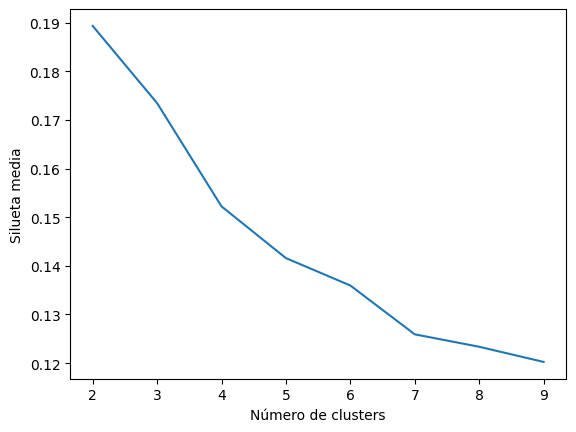

In [6]:
silhouette_scores = []
for k in range(2, 10):
    clustering = AgglomerativeClustering(n_clusters=k)
    clustering.fit(datos)
    score = silhouette_score(datos, clustering.labels_)
    silhouette_scores.append(score)

# Graficar la silueta media en función de k
plt.plot(range(2, 10), silhouette_scores)
plt.xlabel('Número de clusters')
plt.ylabel('Silueta media')
plt.show()

In [7]:
modelo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
modelo.fit(datos)    
etiquetas = modelo.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


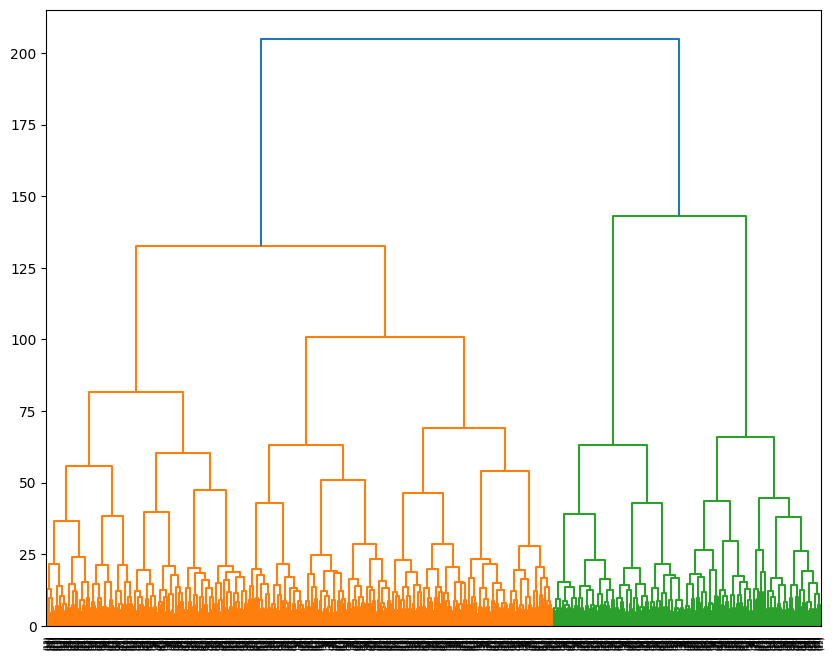

In [8]:
Z = sch.linkage(datos, method='ward', metric='euclidean')

# Obtener los clusters
clusters = cut_tree(Z, n_clusters=3)

# Graficar el dendrograma con los clusters
plt.figure(figsize=(10, 8))
sch.dendrogram(Z, truncate_mode='lastp', p=1000, show_contracted=False)
plt.show()

In [14]:
etiquetas

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
indices = [26, 176, 392, 498]
muestras = pd.DataFrame(datos.loc[indices], columns = datos.keys()).reset_index(drop = True)
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogramas") 
dendrograma = shc.dendrogram(shc.linkage(datos, method = 'ward'), truncate_mode='level', p=5)
#Obtenido el número de clúster se procede a definir los clústeres 
from sklearn.cluster import AgglomerativeClustering
#Se define el algoritmo junto con el valor de K
algoritmo = AgglomerativeClustering(n_clusters = 3, 
                                    affinity='euclidean', linkage='ward')  
#Se entrena el algoritmo
algoritmo.fit(datos)
pred1 = algoritmo.fit_predict(datos)
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.fit_predict(muestras_escalada)
for i, pred in enumerate(muestra_prediccion):
    print( "Muestra", i, "se encuentra en el clúster:", pred)

plt.show()

In [16]:
calificaciones = datos.iloc[:,[0,1,2,3,4,5,6,7,8]].values
Clustering_Jerarquico = linkage(calificaciones, 'ward', n_clusters=3)
dendrogram = sch.dendrogram(Clustering_Jerarquico, truncate_mode='level', p=3)

plt.title('Dendrograma')
plt.xlabel('Indices de la muestra')
plt.ylabel('Distancia Euclidiana')
plt.show()

TypeError: ignored

In [15]:
clustering = AgglomerativeClustering(n_clusters=10)
clustering.fit(datos)
labels = clustering.labels_
labels

array([1, 1, 6, ..., 7, 7, 5])

In [8]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(datos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
kmeans.labels_

array([0, 0, 0, ..., 3, 3, 5], dtype=int32)

In [13]:
Z = linkage(datos, method='ward')
Z

array([[1.00000000e+00, 7.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       [6.00000000e+00, 1.50000000e+01, 1.00000000e+00, 2.00000000e+00],
       [3.45600000e+03, 3.45700000e+03, 1.00000000e+00, 2.00000000e+00],
       ...,
       [2.59140000e+04, 2.59150000e+04, 1.32773471e+02, 8.58800000e+03],
       [2.59100000e+04, 2.59120000e+04, 1.43133278e+02, 4.37200000e+03],
       [2.59160000e+04, 2.59170000e+04, 2.04905140e+02, 1.29600000e+04]])

In [14]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma jerárquico de K-means')
plt.xlabel('Índices de datos')
plt.ylabel('Distancia')
plt.show()

KeyboardInterrupt: ignored

In [28]:
datos['grupo']=kmeans.labels_
datos

,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions,recommendation,grupo
0,2,3,0,0,0,0,0,2,2,0
1,2,3,0,0,0,0,0,1,1,0
2,2,3,0,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2,0
4,2,3,0,0,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1,3,3
12956,0,4,2,3,1,1,2,0,0,5
12957,0,4,2,3,1,1,1,2,3,3
12958,0,4,2,3,1,1,1,1,3,3


In [29]:
datos1= datos.loc[(datos['grupo'] == 0)]
datos1

,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions,recommendation,grupo
0,2,3,0,0,0,0,0,2,2,0
1,2,3,0,0,0,0,0,1,1,0
2,2,3,0,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2,0
4,2,3,0,0,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
12413,0,4,1,1,1,1,0,0,0,0
12416,0,4,1,1,1,1,2,0,0,0
12419,0,4,1,1,1,1,1,0,0,0
12744,0,4,2,0,0,0,0,2,1,0


In [21]:
datos.dtypes

parents_occupation    int64
childs_nursery        int64
family_form           int64
number_children       int64
housing_conditions    int64
financial_standing    int64
social_conditions     int64
health_conditions     int64
recommendation        int64
dtype: object

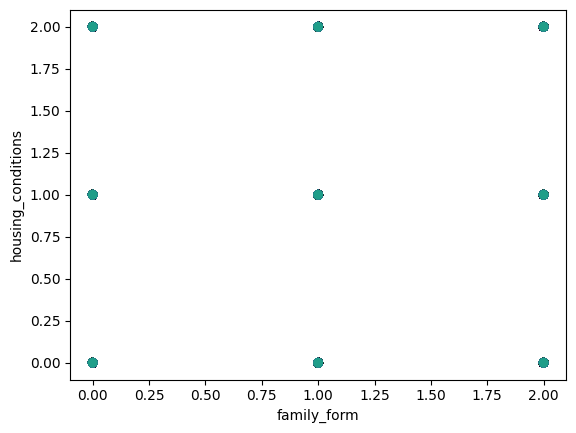

In [32]:
import matplotlib.pyplot as plt
plt.scatter(datos['housing_conditions'], datos['parents_occupation'] , c=kmeans.labels_)
plt.xlabel('family_form')
plt.ylabel('housing_conditions')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(datos)
labels = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
